# Visualizaciones en Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv'
df = pd.read_csv(url, sep = ',')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Paso a paso

Para arrancar a visualizar usando Seaborn.

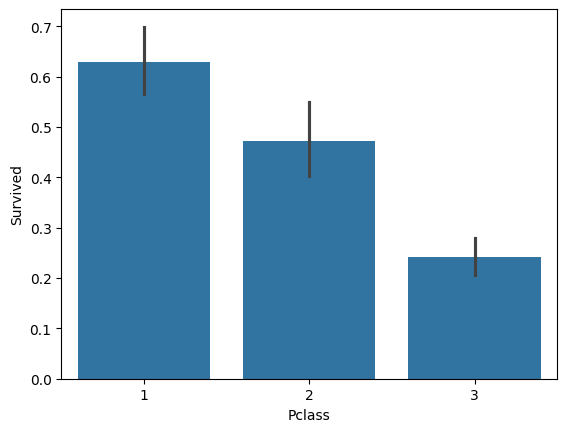

In [2]:
# Siguiendo los pasos 
# 1) Importar librerias 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2) Crear objeto de figura
plt.figure()

# 3) Dibujar 
# BARPLOT 
sns.barplot(data = df,
           x = 'Pclass',
           y = 'Survived')

#4) Mostrar
plt.show()


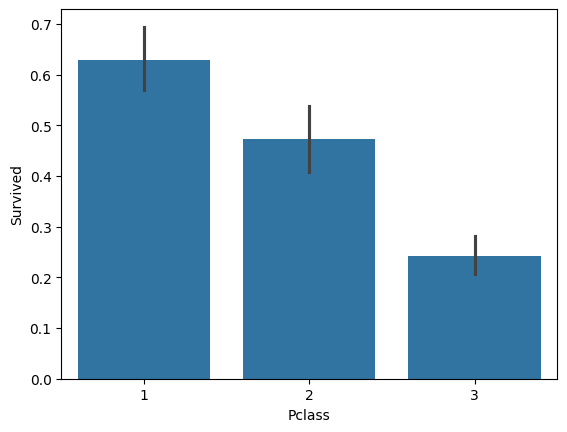

In [3]:
# EJEMPLO 1) BARPLOT: 
plt.figure()
sns.barplot(data = df,
           x = 'Pclass',
           y = 'Survived')
plt.show()


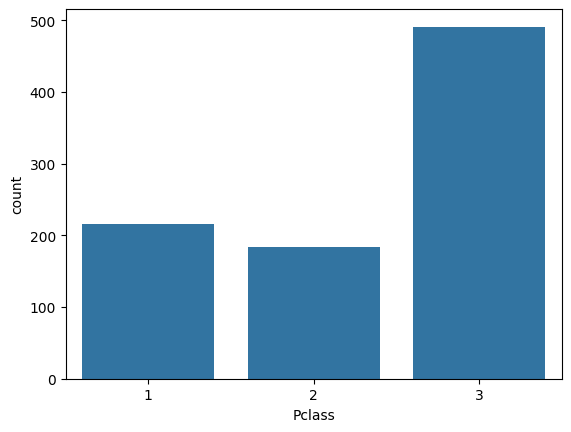

In [4]:
plt.figure()
sns.countplot(data = df,
              x = 'Pclass')
plt.show()

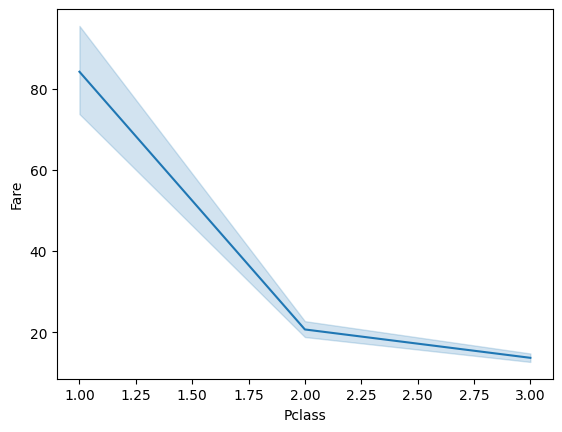

In [5]:
# EJEMPLO 2) LINEPLOT 
plt.figure()
sns.lineplot(data = df,
             x = 'Pclass',
             y = 'Fare')
plt.show()

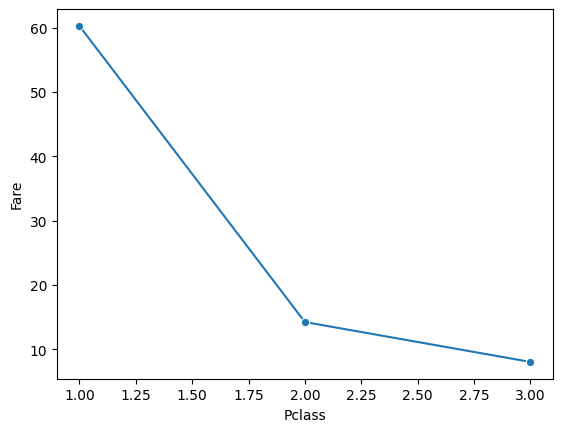

In [6]:
plt.figure()
sns.lineplot(data = df,
             x = 'Pclass',
             y = 'Fare',
             marker = 'o',
             errorbar = None,
             estimator = np.median)
plt.show()

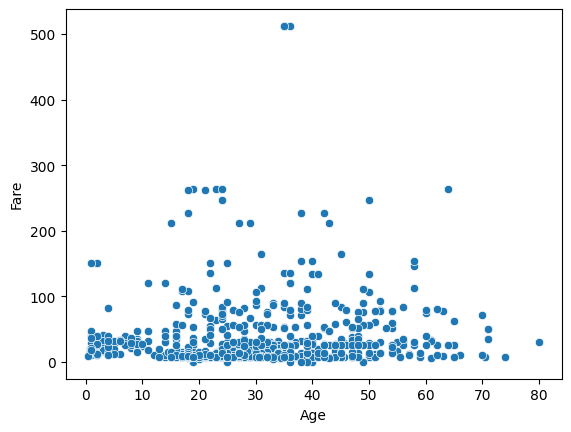

In [7]:
# EJEMPLO 3) SCATTERPLOT 
plt.figure()
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Fare')
plt.show()

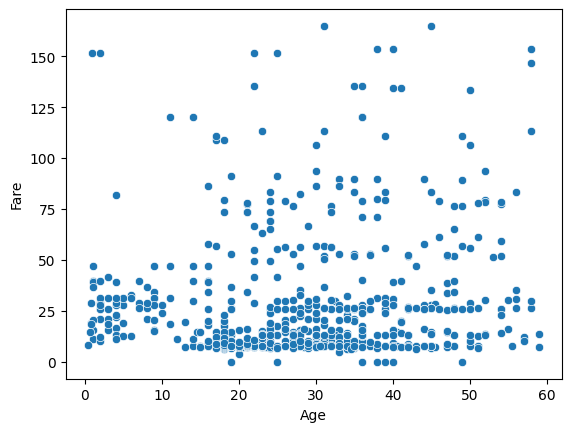

In [8]:
# Probamos con Fare<200

# Probamos con Fare < 200
df_2 = df.loc[df['Fare'] < 200]
# Saquemos también a los mayores de 60
df_2 = df_2.loc[df_2['Age'] < 60]
# Visualizo normalmente, pero cambio el origen
plt.figure()
sns.scatterplot(data = df_2,
                x = 'Age',
                y = 'Fare')
plt.show()

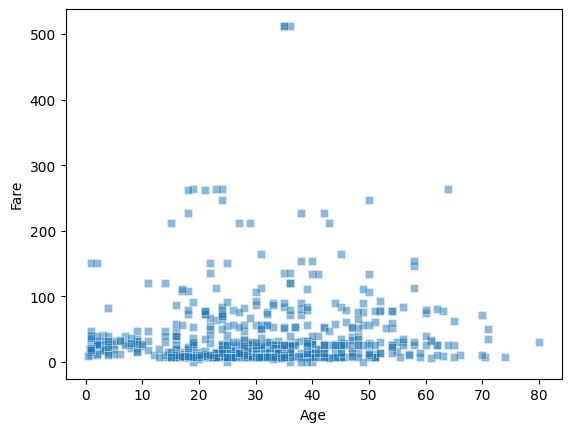

In [14]:
plt.figure()
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Fare',
               alpha = 0.5,
               marker = 's')
plt.show()

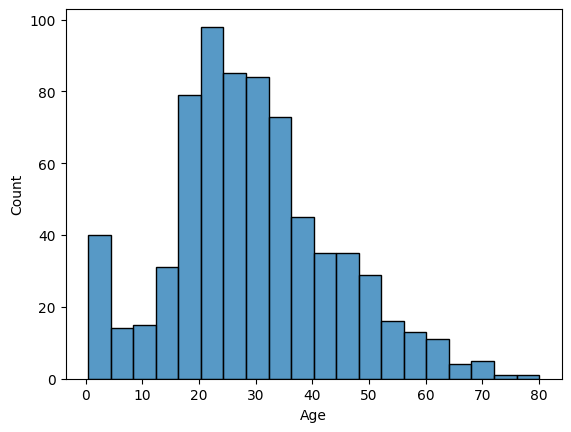

In [13]:
# EJEMPLO 4) HISTOGRAMA 
plt.figure()
sns.histplot(data = df,
                x = 'Age')
plt.show()

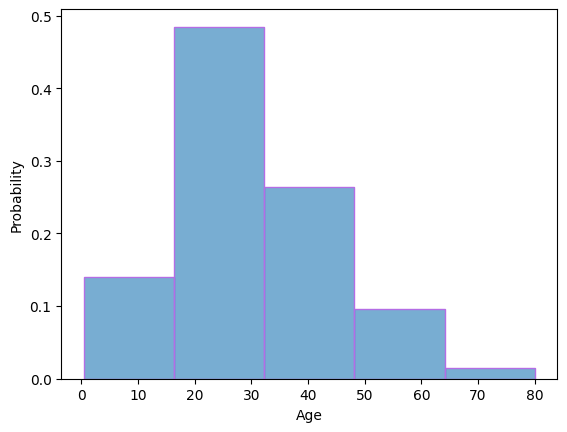

In [12]:
plt.figure()
sns.histplot(data = df,
             x = 'Age',
             alpha = 0.6,
             edgecolor = '#B46DE5',
             stat = 'probability', 
             bins = 5)
plt.show()

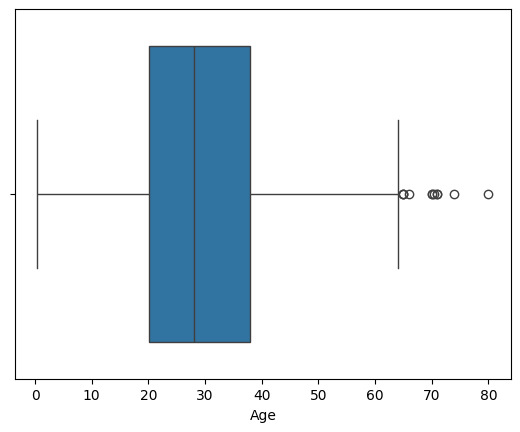

In [11]:
# EJEMPLO 5) BOXPLOT 
plt.figure()
sns.boxplot(data = df,
            x = 'Age')
plt.show()

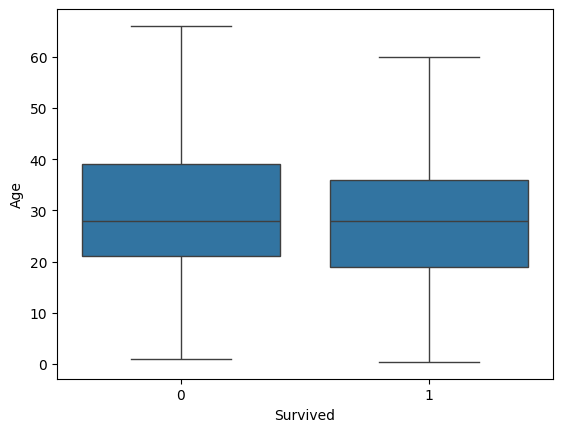

In [15]:
plt.figure()
sns.boxplot(data = df,
            x = 'Survived',
            y = 'Age', 
            showfliers = False)
plt.show()

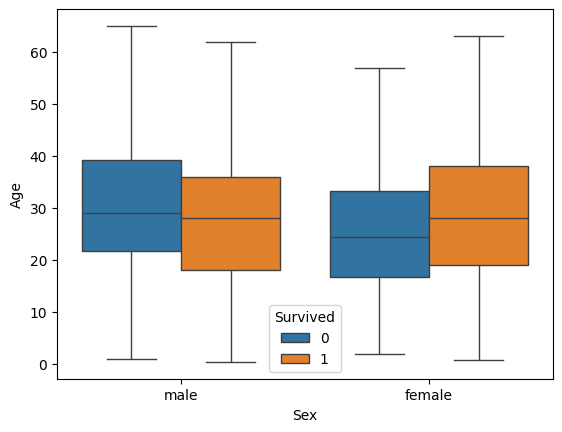

In [21]:
plt.figure()
sns.boxplot(data = df,
            x = 'Sex',
            y = 'Age', 
            hue = 'Survived',
            showfliers = False)
plt.show()

# Parámetro "HUE"
Lo vamos a usar mucho. Nos sirve para generar más d eun gráfico en el mismo lienzo, segmentando por alguna variable categórica. 

<Axes: xlabel='Age', ylabel='Probability'>

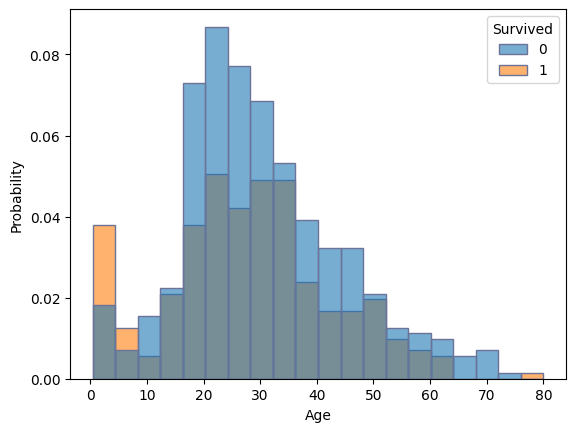

In [22]:
# PARÁMETRO HUE 
plt.figure()
sns.histplot(data = df,
             x = 'Age',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'Survived')

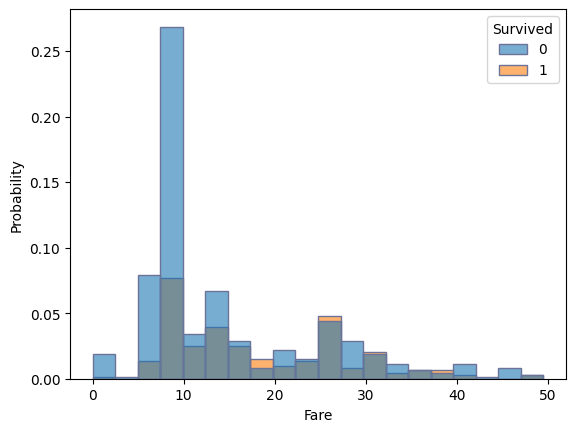

In [26]:
# Evaluamos variable Fare
df_3 = df.loc[df['Fare'] < 50]

plt.figure()
sns.histplot(data = df_3,
             x = 'Fare',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'Survived')
plt.show()

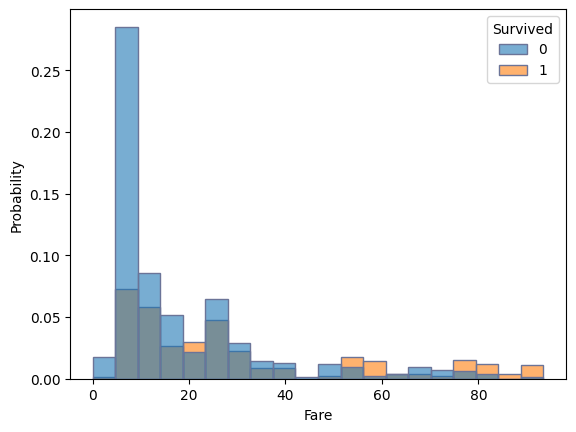

In [27]:
# Evaluamos variable Fare
df_3 = df.loc[df['Fare'] < 100]

plt.figure()
sns.histplot(data = df_3,
             x = 'Fare',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'Survived')
plt.show()


# Subplots

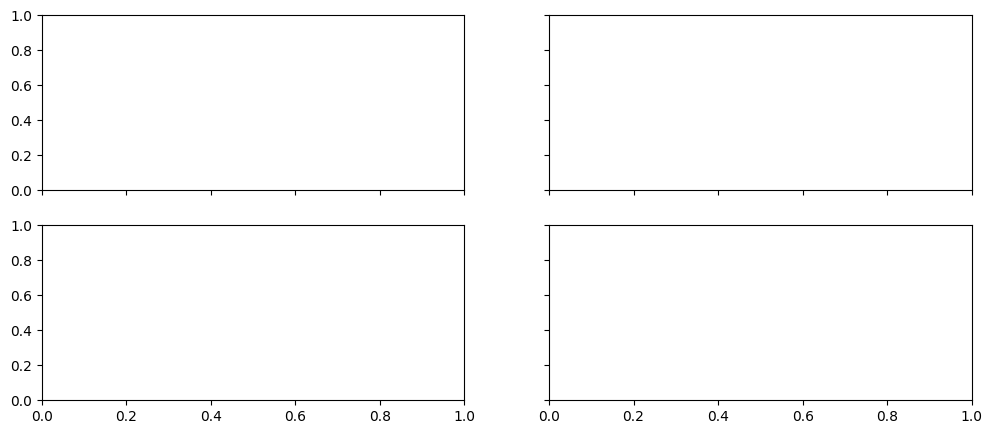

In [28]:
# SUBGRÁFICOS
fig, ax = plt.subplots(nrows = 2,
                      ncols = 2,
                      figsize = (12,5),
                      sharex = True, # Esto significa que todas las subtramas comparten el mismo eje x. 
                      sharey = True) # Todos los gráficos tienen el mismo eje y.

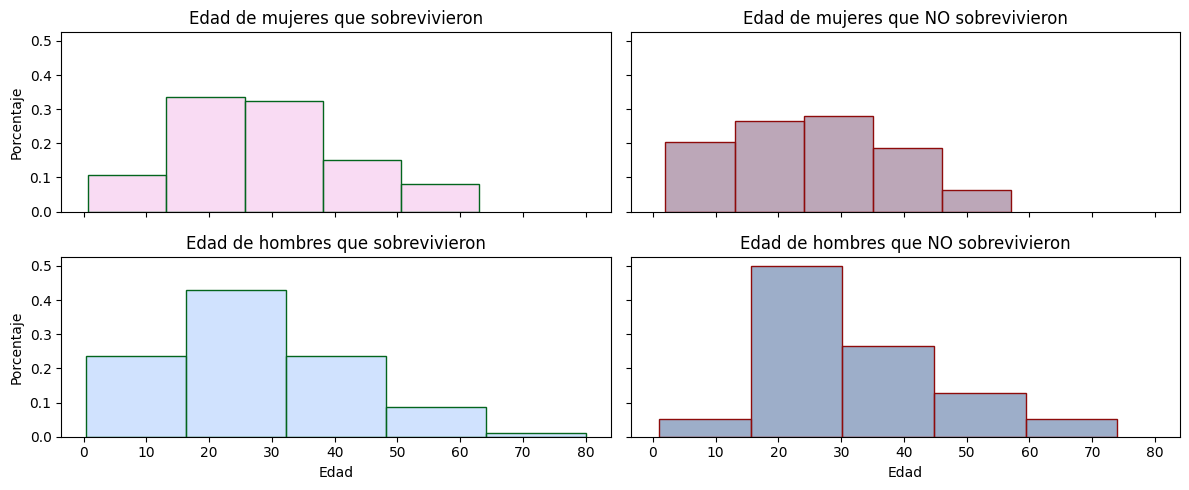

In [29]:
fig, ax = plt.subplots(nrows = 2,
                      ncols = 2,
                      figsize = (12,5),
                      sharex = True, 
                      sharey = True) 

femenino_sobrevivio = (df['Sex'] == "female") & (df['Survived'] == 1)
femenino_nosobrevivio = (df['Sex'] == "female") & (df['Survived'] == 0)
masculino_sobrevivio = (df['Sex'] == "male") & (df['Survived'] == 1)
masculino_nosobrevivio = (df['Sex'] == "male") & (df['Survived'] == 0)

sns.histplot(data = df.loc[femenino_sobrevivio,], 
             x = 'Age', 
             ax = ax[0, 0],
             alpha = 0.6,
             color = '#F5C3EB',
             stat = 'probability', 
             bins = 5,
             edgecolor = '#03651D')
ax[0, 0].set_title('Edad de mujeres que sobrevivieron')
ax[0, 0].set_xlabel('Edad')
ax[0, 0].set_ylabel('Porcentaje')

sns.histplot(data = df.loc[femenino_nosobrevivio,], 
             x = 'Age', 
             ax = ax[0, 1],
             alpha = 0.6,
             color = '#906D89',
             stat = 'probability', 
             bins = 5,            
             edgecolor = '#8E0B0B')
ax[0, 1].set_title('Edad de mujeres que NO sobrevivieron')
ax[0, 1].set_xlabel('Edad')
ax[0, 1].set_ylabel('Porcentaje')

sns.histplot(data = df.loc[masculino_sobrevivio,], 
             x = 'Age', 
             ax = ax[1, 0],
             alpha = 0.6,
             color = '#B1CFFE',
             stat = 'probability', 
             bins = 5,            
             edgecolor = '#03651D')
ax[1, 0].set_title('Edad de hombres que sobrevivieron')
ax[1, 0].set_xlabel('Edad')
ax[1, 0].set_ylabel('Porcentaje')

sns.histplot(data = df.loc[masculino_nosobrevivio,], 
             x = 'Age', 
             ax = ax[1, 1],
             alpha = 0.6,
             color = '#5C79A6',
             stat = 'probability', 
             bins = 5,            
             edgecolor = '#8E0B0B')
ax[1, 1].set_title('Edad de hombres que NO sobrevivieron')
ax[1, 1].set_xlabel('Edad')
ax[1, 1].set_ylabel('Porcentaje')

# Ajustar el diseño de la figura
plt.tight_layout()

# Muestra
plt.show()

# Facetgrid: un Subplot más automático

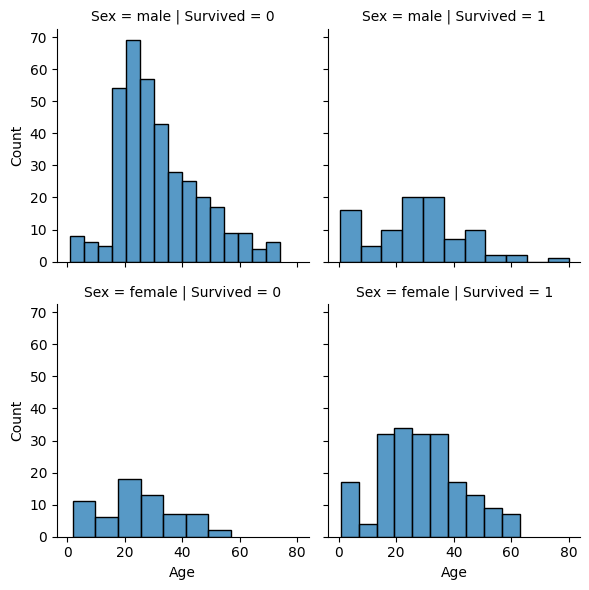

In [30]:
# FACETGRID
g = sns.FacetGrid(df, 
                  col = "Survived",  
                  row = "Sex")
g.map(sns.histplot, "Age") 
plt.show()

# Customizaciones

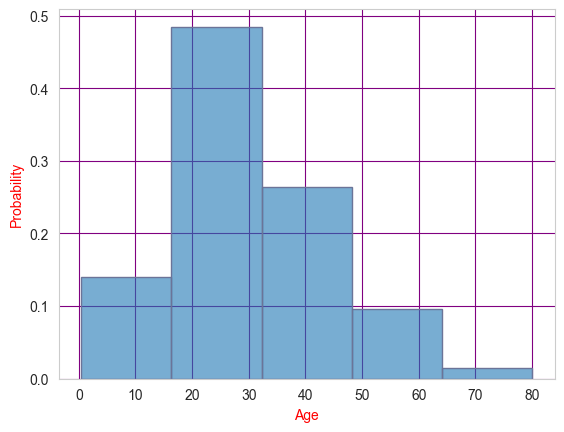

In [31]:
# CUSTOMIZACIONES 
sns.set_style(style="whitegrid",
              rc={"grid.color": "purple",
                 "axes.labelcolor": "red"})
plt.figure()
sns.histplot(data = df,
             x = 'Age',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 5)

plt.show()



## Gráfico de Violin
Es útil para comparar distribuciones de la combinación de dos variables categóricas a la vez. 

Algo muy similar se puede hacer con un boxplot... 

In [32]:
sns.reset_orig()

<Figure size 640x480 with 0 Axes>

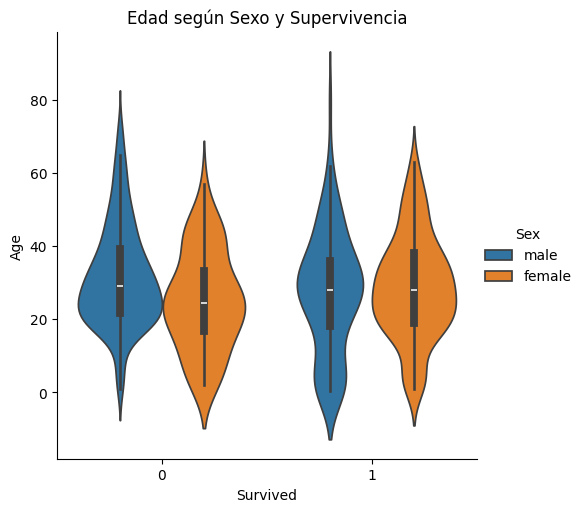

In [33]:
plt.figure()
sns.catplot(data = df,
            x = 'Survived',
            y = 'Age', 
            hue = 'Sex',
            kind = 'violin')

plt.title('Edad según Sexo y Supervivencia')

plt.show()

<Figure size 640x480 with 0 Axes>

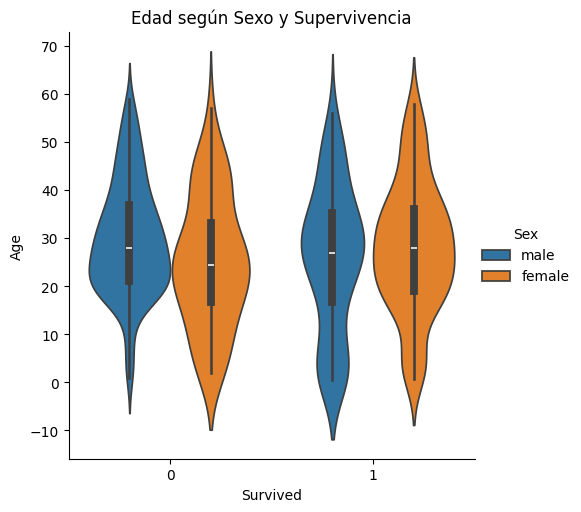

In [34]:
plt.figure()
sns.catplot(data = df_2,
            x = 'Survived',
            y = 'Age', 
            hue = 'Sex',
            kind = 'violin')

plt.title('Edad según Sexo y Supervivencia')

plt.show()

<Figure size 640x480 with 0 Axes>

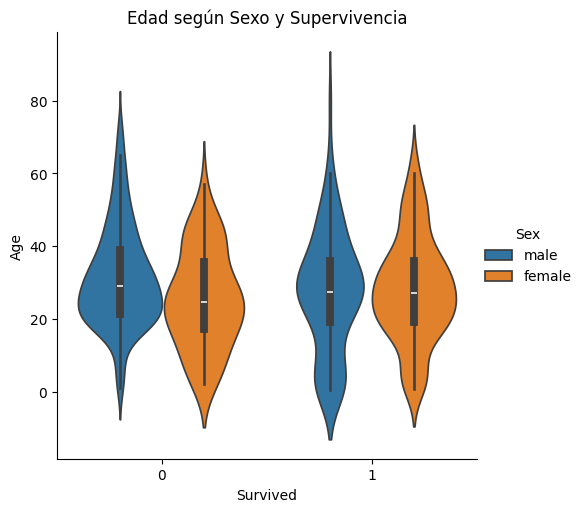

In [35]:
plt.figure()
sns.catplot(data = df_3,
            x = 'Survived',
            y = 'Age', 
            hue = 'Sex',
            kind = 'violin')

plt.title('Edad según Sexo y Supervivencia')

plt.show()

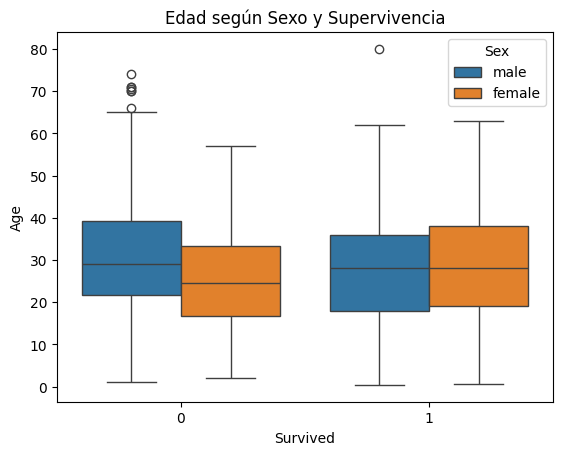

In [36]:
plt.figure()
sns.boxplot(data = df,
            x = 'Survived',
            y = 'Age', 
            hue = 'Sex')

plt.title('Edad según Sexo y Supervivencia')

plt.show()

## Gráfico de Densidad
**Parámetro bw_adjust:** El ancho de banda controla la suavidad de la estimación de densidad. Un ancho de banda más pequeño puede hacer que la curva sea más sensible a los datos individuales, mientras que un ancho de banda más grande puede suavizar demasiado la curva.

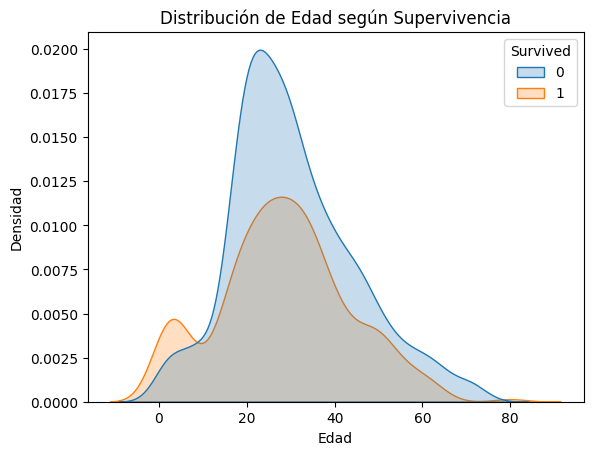

In [37]:
plt.figure()
sns.kdeplot(data = df,
             x = 'Age',
             fill = True,
             hue = 'Survived',
             bw_adjust = 0.8)

plt.title('Distribución de Edad según Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

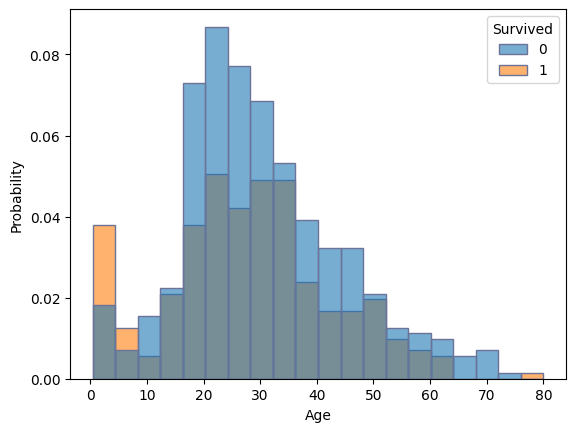

In [40]:
df_3 = df.loc[df['Fare'] < 100]

plt.figure()
sns.histplot(data = df,
             x = 'Age',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'Survived')
plt.show()